In [5]:
# Importing the libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

In [6]:
# Creating objects to detect the face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

### Creating a dataset by capturing 300 images of a subject

### Reading and preprocessing dataset stored in a single directory

In [7]:
# Function defined to read image data and resize it to (224,224)
def pre_process(file_name, path):
    global img 
    IMG_SHAPE = 224
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".HEIC"):
        img = cv2.imread(pa + "\\"+file_name)
        if img is None:
            print('Wrong path:', path)
        else:
            img = cv2.resize(img, (IMG_SHAPE,IMG_SHAPE), interpolation = cv2.INTER_AREA)
    return img

In [11]:
# Reading image dataset
images = []
labels = []
indice = 0
boolean = 1
pa = 'C:\\Users\\DELL\\Desktop\\ITIC Internship\\dataset'
for file_name in os.listdir(pa):
    #print(os.listdir(pa))
    if file_name.startswith("Meet"):
        label = 0
        img = pre_process(file_name, pa)
    elif file_name.startswith("alex"):
        label = 1
        img = pre_process(file_name, pa)
    elif file_name.startswith("sameeda"):
        label = 2
        img = pre_process(file_name, pa)
    elif file_name.startswith("Neeharika"):
        label = 3
        img = pre_process(file_name, pa)

    images.append(img)
    labels.append(label)
    indice = indice + 1

Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset
Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset
Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset
Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset
Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset
Wrong path: C:\Users\DELL\Desktop\ITIC Internship\dataset


In [14]:
len(labels)

330

In [26]:
#!pip install tensorflow

### Applying data augmentation technique

we make use of data augmentation technique to improve the quality of images and to increase the number of images in the dataset.
data augmentation function returns 6 images with slight variation in all of them, thus to bring more versatality to the dataset.

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
def img_augment(img):
    img_aug = []
    datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=45, 
                                 brightness_range=[0.2,1.5])
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(5):
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        img_aug.append(image)
    img_aug.append(img)
    return img_aug

In [17]:
# Calling the data augmentation function
img = []
X = []
y = []
for j,image in tqdm(enumerate(images)):
    try:
        img = img_augment(image)
        for i in img:
            X.append(i)
            y.append(labels[j])
    except:
        continue


0it [00:00, ?it/s]
2it [00:00, 15.21it/s]
4it [00:00, 15.66it/s]
6it [00:00, 15.53it/s]
8it [00:00, 15.91it/s]
10it [00:00, 15.07it/s]
12it [00:00, 15.60it/s]
14it [00:00, 15.50it/s]
16it [00:01, 14.73it/s]
18it [00:01, 14.83it/s]
20it [00:01, 14.84it/s]
22it [00:01, 14.97it/s]
24it [00:01, 14.96it/s]
26it [00:01, 15.51it/s]
28it [00:01, 15.42it/s]
30it [00:01, 15.81it/s]
32it [00:02, 15.08it/s]
34it [00:02, 14.90it/s]
36it [00:02, 15.00it/s]
38it [00:02, 13.94it/s]
40it [00:02, 14.20it/s]
42it [00:02, 14.52it/s]
44it [00:02, 15.20it/s]
46it [00:03, 15.22it/s]
48it [00:03, 15.11it/s]
50it [00:03, 15.12it/s]
52it [00:03, 15.61it/s]
54it [00:03, 15.49it/s]
56it [00:03, 15.31it/s]
58it [00:03, 15.76it/s]
60it [00:03, 15.62it/s]
62it [00:04, 15.96it/s]
64it [00:04, 15.63it/s]
66it [00:04, 14.77it/s]
68it [00:04, 14.93it/s]
70it [00:04, 14.84it/s]
72it [00:04, 14.47it/s]
74it [00:04, 14.69it/s]
76it [00:05, 14.82it/s]
78it [00:05, 15.37it/s]
80it [00:05, 14.66it/s]
82it [00:05, 14.88it/s]


In [18]:
len(X)

1944

In [19]:
len(y)

1944

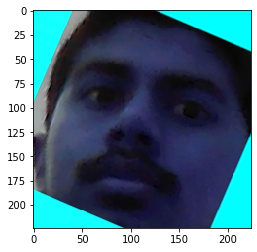

In [23]:
plt.imshow(X[1900])

In [22]:
y[1900]

0

In [24]:
# Reshaping images
IMG_SHAPE = 224
n=len(X)

data_images = np.zeros((n,IMG_SHAPE,IMG_SHAPE,3),dtype=np.float32)
data_labels = np.zeros((n),dtype=np.float32)

i = 0
for item in range(len(X)):
    data_images[i,:,:,:] = X[item]/223
    data_labels[i] = y[item]
    i = i+1

### Splitting the dataset for training and testing

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data_images, data_labels, test_size=0.1, random_state=42)

### Creating a model using deep neural networks

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
#from keras.utils import to_categorical

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        7

In [29]:
model.compile(optimizer = keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
model.fit(X_train, y_train, batch_size=5, epochs=10, validation_split=0.20)

Epoch 1/10
280/280 [==============================] - 94s 333ms/step - loss: 0.1971 - accuracy: 0.9543 - val_loss: 0.2746 - val_accuracy: 0.9657
Epoch 2/10
280/280 [==============================] - 93s 332ms/step - loss: 0.0907 - accuracy: 0.9871 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 3/10
280/280 [==============================] - 89s 316ms/step - loss: 0.0758 - accuracy: 0.9900 - val_loss: 0.0950 - val_accuracy: 0.9600
Epoch 4/10
280/280 [==============================] - 98s 352ms/step - loss: 0.0663 - accuracy: 0.9907 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 5/10
280/280 [==============================] - 95s 339ms/step - loss: 0.0388 - accuracy: 0.9943 - val_loss: 3.2738e-04 - val_accuracy: 1.0000
Epoch 6/10
280/280 [==============================] - 91s 323ms/step - loss: 0.0506 - accuracy: 0.9893 - val_loss: 0.0410 - val_accuracy: 0.9800
Epoch 7/10
280/280 [==============================] - 85s 305ms/step - loss: 0.0389 - accuracy: 0.9886 - val_loss: 5.3984e-04 

### Saving the created model for making predictions

In [34]:
model.save("C:\\Users\\DELL\\Desktop\\ITIC Internship\\Models\\model.h5")

In [35]:
y_pred = model.predict(X_test, batch_size = 5 )
y_pred = list(y_pred)

In [36]:
y_output = []
for i in range(len(y_pred)):
    max_val = max(y_pred[i])
    max_val_ind = list(y_pred[i]).index(max_val)
    y_output.append(max_val_ind)

<Figure size 432x288 with 0 Axes>

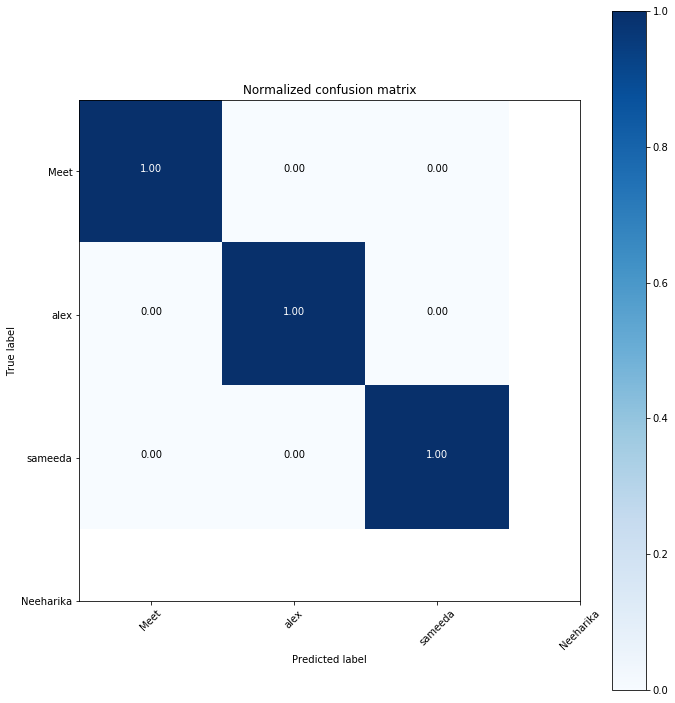

In [38]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Meet', 'alex', 'sameeda', 'Neeharika']
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_output)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()